# Project Machine Learning on Solar Flares from RHESSI Mission

# Dimo Dimov (SoftUni user name: D.Dimov_96)

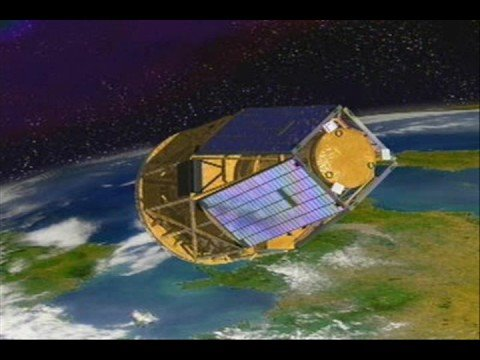

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("cOSIZDPa8Qc", width=900, height=675)

# General theme: Astronomy

# Specific theme: Solar

From datasets:
    0. Solar and Lunar Eclipses (https://www.kaggle.com/nasa/solar-eclipses)
    1. Trappist-1 Solar System (https://www.kaggle.com/nasa/trappist1)
    2. Open Exoplanet Catalogue (https://www.kaggle.com/mrisdal/open-exoplanet-catalogue)
    3. Solar Flares from RHESSI Mission (https://www.kaggle.com/khsamaha/solar-flares-rhessi)
    4. Star Cluster Simulations (https://www.kaggle.com/mariopasquato/star-cluster-simulations)
    5. Exoplanet Hunting in Deep Space (https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data)

### I chose: 3. Solar Flares from RHESSI Mission (https://www.kaggle.com/khsamaha/solar-flares-rhessi)

### Because it was the most interesting with many observations

## Description in "Description on Solar Flares from RHESSI Mission.txt"

I acquainted with:
    0. Solar flare summary 3 (https://www.kaggle.com/khsamaha/d/khsamaha/solar-flares-rhessi/solar-flare-summary-3)
    1. Solar flare summary 4 (https://www.kaggle.com/khsamaha/d/khsamaha/solar-flares-rhessi/solar-flares-summary-4)
    2. Solar flares study (https://www.kaggle.com/jonathanbouchet/d/khsamaha/solar-flares-rhessi/solar-flares-study)
    3. Solar Flares from RHESSI Mission (https://www.kaggle.com/jmquintana/d/khsamaha/solar-flares-rhessi/solar-flares-from-rhessi-mission)

# Import

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Read

In [2]:
rhessi = pd.read_csv("hessi.solar.flare.2002to2016.csv")
rhessi.columns = ["flare", "start_date", "start_time", "peak", "end", "duration_s", "peak_c_s", "total_counts", "energy_kev", "x_pos_asec", "y_pos_asec", "radial", "active_region_ar", "flag_1", "flag_2", "flag_3", "flag_4", "flag_5"]
print("Shape :", rhessi.shape)
rhessi.head()

Shape : (113942, 18)


,flare,start_date,start_time,peak,end,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,flag_5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


# The columns are:

Description from Solar Flares from RHESSI Mission (https://www.kaggle.com/jmquintana/d/khsamaha/solar-flares-rhessi/solar-flares-from-rhessi-mission) and Description on Solar Flares from RHESSI Mission.txt

    0. Flare - An ID number
    1. Date - The date when the flare occurred
    2. Start - Flare start time
    3. Peak - Flare peak time
    4. End - Flare end time
    5. Dur[s] - Duration of flare in seconds
    6. Peak[c/s] - Peak count rate in corrected counts, peak counts/second
    7. Total Counts - Total of counts in corrected counts, counts in energy range
    8. Energy [keV] - The highest energy band in which the flare was observed.
    9. X pos [asec] - Flare position in arcsec from sun center
    10. Y pos [asec] - Flare position in arcsec from sun center
    11. Radial [asec] - Radial distance in arcsec from sun center
    12. Active Region [ar] - A number for the closest active region, if available
    13. Flags - Quality Codes
        * a0 - In attenuator state 0 (None) sometime during flare
        * a1 - In attenuator state 1 (Thin) sometime during flare
        * a2 - In attenuator state 2 (Thick) sometime during flare
        * a3 - In attenuator state 3 (Both) sometime during flare
        * An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare
        * DF - Front segment counts were decimated sometime during flare
        * DR - Rear segment counts were decimated sometime during flare
        * ED - Spacecraft eclipse (night) sometime during flare
        * EE - Flare ended in spacecraft eclipse (night)
        * ES - Flare started in spacecraft eclipse (night)
        * FE - Flare ongoing at end of file
        * FR - In Fast Rate Mode
        * FS - Flare ongoing at start of file
        * GD - Data gap during flare
        * GE - Flare ended in data gap
        * GS - Flare started in data gap
        * MR - Spacecraft in high-latitude zone during flare
        * NS - Non-solar event
        * PE - Particle event: Particles are present
        * PS - Possible Solar Flare; in front detectors, but no position
        * Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid
        * Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality
        * SD - Spacecraft was in SAA sometime during flare
        * SE - Flare ended when spacecraft was in SAA
        * SS - Flare started when spacecraft was in SAA

# I will predict the energy (total_counts and energy_kev)

## total_counts for Regression

## energy_kev for Classification

## I first have to clean the dataset

For this project I will not get rid of:
    0. flare - because it is not necessary
    1. date and time - because I will not predict the quantity nor the time of occurrence nor the duration
    2. active_region_ar - because I do not think it is necessary for my models
    3. flags - because they will complicate my models

In [3]:
rhessi_clean = rhessi.drop("flare", axis = 1)
rhessi_clean = rhessi_clean.drop("start_date", axis = 1)
rhessi_clean = rhessi_clean.drop("start_time", axis = 1)
rhessi_clean = rhessi_clean.drop("peak", axis = 1)
rhessi_clean = rhessi_clean.drop("end", axis = 1)
rhessi_clean = rhessi_clean.drop("active_region_ar", axis = 1)
rhessi_clean = rhessi_clean.drop("flag_1", axis = 1)
rhessi_clean = rhessi_clean.drop("flag_2", axis = 1)
rhessi_clean = rhessi_clean.drop("flag_3", axis = 1)
rhessi_clean = rhessi_clean.drop("flag_4", axis = 1)
rhessi_clean = rhessi_clean.drop("flag_5", axis = 1)
rhessi_clean.head()

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial
0,712,136,167304,12-25,592,-358,692
1,288,7,9504,6-12,604,-341,694
2,216,15,11448,6-12,-310,375,487
3,244,20,17400,12-25,-277,378,469
4,236,336,313392,25-50,-272,390,476


## Second I will see what corrections are in the data

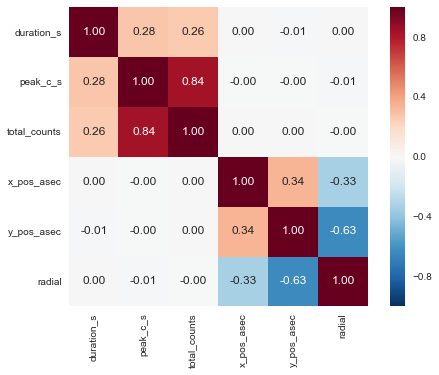

In [5]:
sns.heatmap(rhessi_clean.corr(), annot = True, fmt = ".2f", square = True)

total_counts correlates strongly with peak_c_s and weakly with duration_s

I notice interesting correlations between x_pos_asec, y_pos_asec and radial

I will examine them in detail

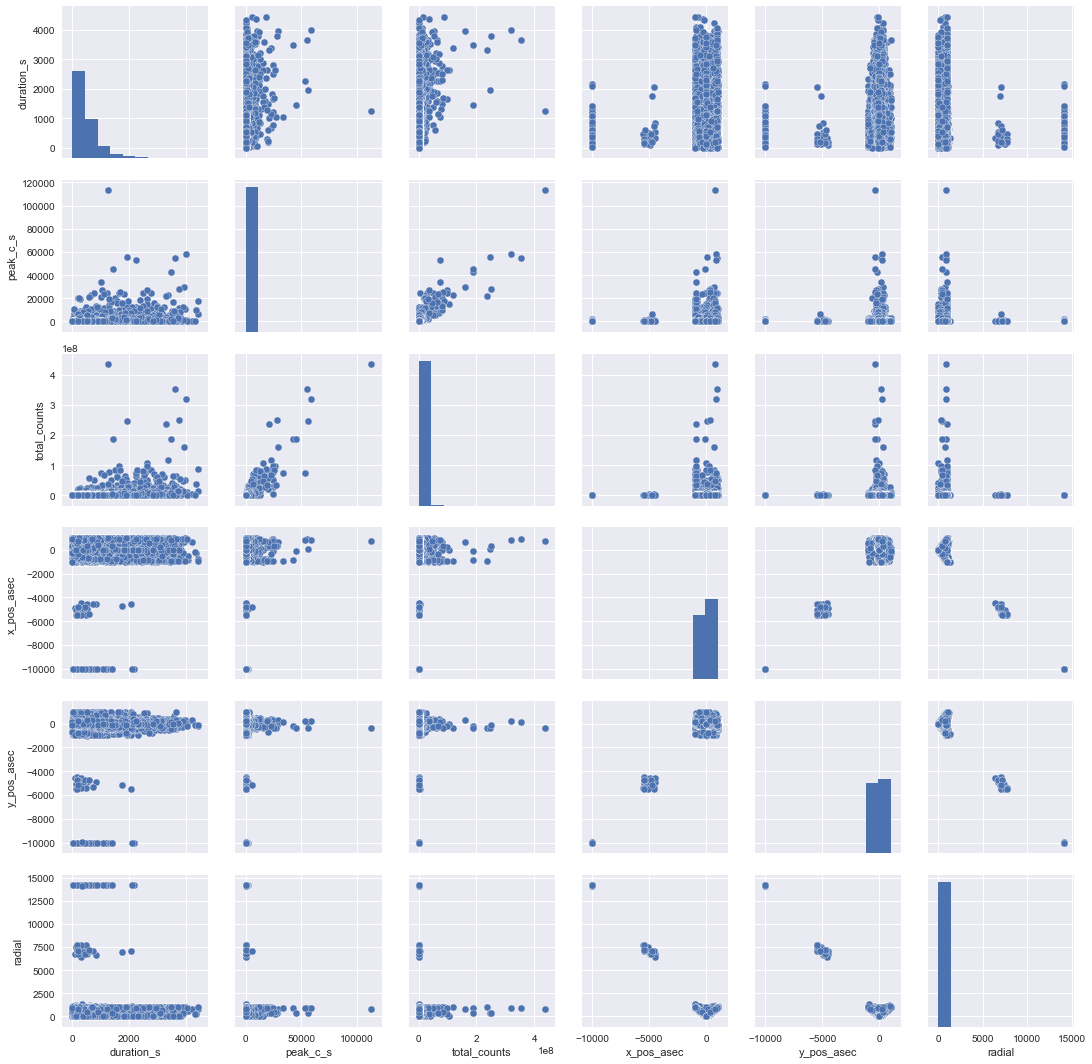

In [6]:
sns.pairplot(rhessi_clean)

I notice a linear dependence between total_counts and peak_c_s

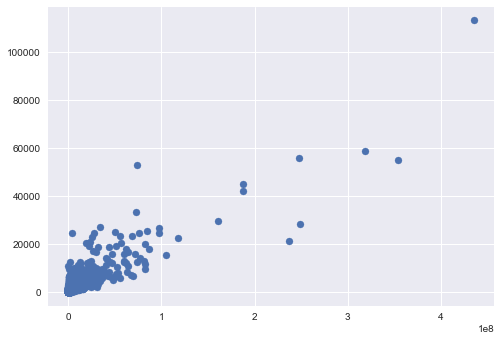

In [7]:
plt.scatter(rhessi_clean.total_counts,rhessi_clean.peak_c_s)

I notice clusters between x_pos_asec and y_pos_asec

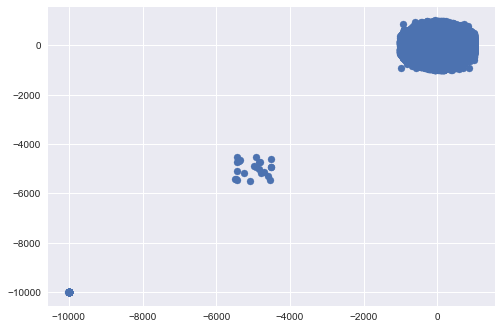

In [8]:
plt.scatter(rhessi_clean.x_pos_asec,rhessi_clean.y_pos_asec)

# I decide to see the clusters

Let's look at clusters closely

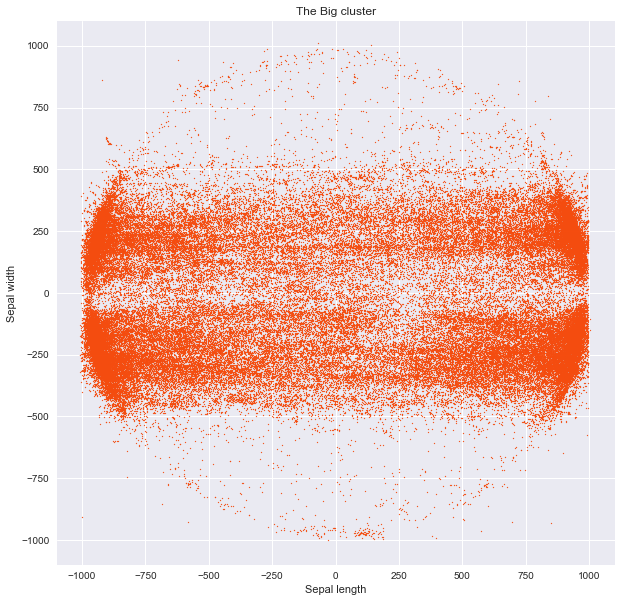

In [9]:
plt.figure(figsize=[10, 10])
plt.xlim(-1100, 1100)
plt.ylim(-1100, 1100)
plt.scatter(rhessi_clean.x_pos_asec,rhessi_clean.y_pos_asec, s=1, c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Big cluster")

This is the distribution of the eruptions on the sun

## This picture is observed because:

Different parts of the sun rotate at different speeds: the gas at the equator rotates faster than does that at the poles. This differential rotation shears the gas and affects the Sun's magnetic field. As time goes on, the magnetic-field lines become highly distorted and twisted.

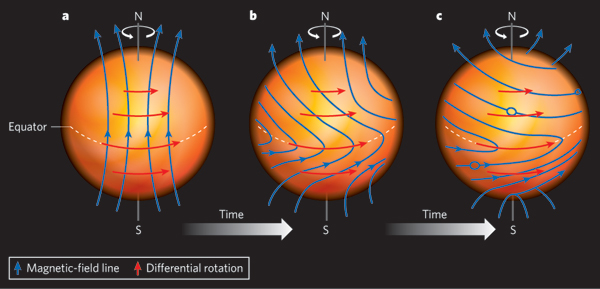

In [1]:
from IPython.display import Image
Image("The Sun's swirling magnetic field.jpg")

Image source: (http://www.nature.com/nature/journal/v457/n7226/fig_tab/457158a_F1.html)

## So Solar Flares concentrates in these areas

# Simulation of Solar Flares

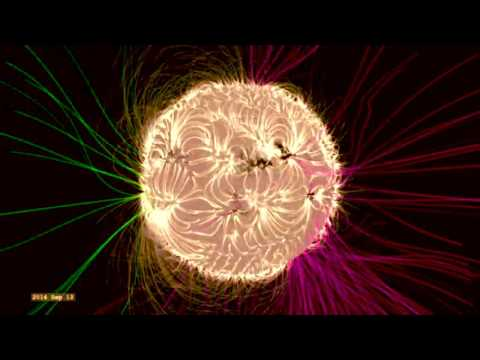

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("YJ7UBHC8d1E", width=900, height=675)

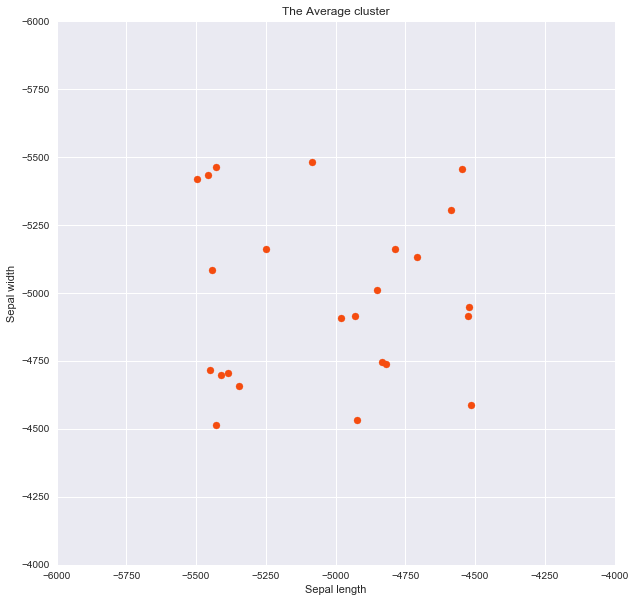

In [10]:
plt.figure(figsize=[10, 10])
plt.xlim(-6000, -4000)
plt.ylim(-4000, -6000)
plt.scatter(rhessi_clean.x_pos_asec,rhessi_clean.y_pos_asec,c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Average cluster")

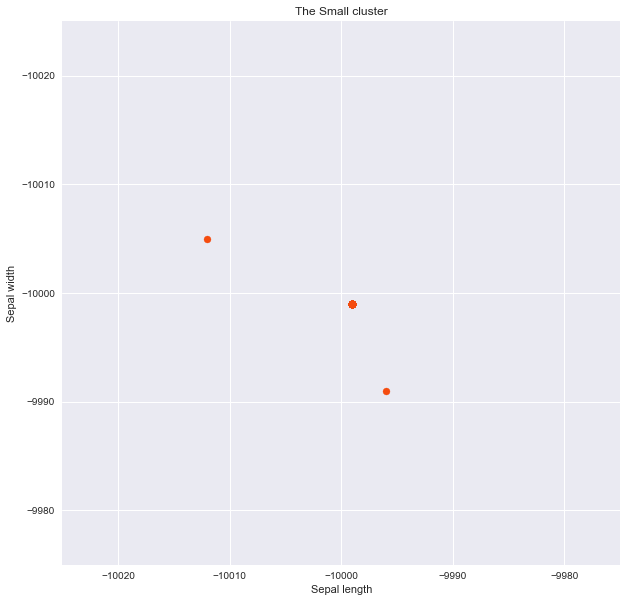

In [11]:
plt.figure(figsize=[10, 10])
plt.xlim(-10025, -9975)
plt.ylim(-9975, -10025)
plt.scatter(rhessi_clean.x_pos_asec,rhessi_clean.y_pos_asec,c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Small cluster")

The Average cluster and the Small cluster can not be used but they are real observations

## I continue with the preparation of regression and classification data

# Third I will divide the data into attributes and labels

In [12]:
rhessi_clean.head() # data

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial
0,712,136,167304,12-25,592,-358,692
1,288,7,9504,6-12,604,-341,694
2,216,15,11448,6-12,-310,375,487
3,244,20,17400,12-25,-277,378,469
4,236,336,313392,25-50,-272,390,476


## I will use LabelEncoder for energy_kev

In [4]:
rhessi_clean.energy_kev = LabelEncoder().fit_transform(rhessi_clean.energy_kev)
rhessi_clean.head()

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial
0,712,136,167304,1,592,-358,692
1,288,7,9504,6,604,-341,694
2,216,15,11448,6,-310,375,487
3,244,20,17400,1,-277,378,469
4,236,336,313392,2,-272,390,476


## I will take the attributes, the labels for classification and the labels for regression

In [5]:
labels_classification_energy_kev = rhessi_clean.energy_kev
labels_regression_total_counts = rhessi_clean.total_counts
attributes = rhessi_clean.drop(["total_counts","energy_kev"], axis = 1)
attributes.head()

,duration_s,peak_c_s,x_pos_asec,y_pos_asec,radial
0,712,136,592,-358,692
1,288,7,604,-341,694
2,216,15,-310,375,487
3,244,20,-277,378,469
4,236,336,-272,390,476


## I will use StandardScaler for the attributes and the labels for regression

In [6]:
labels_regression_total_counts_standardscaler = StandardScaler().fit_transform(labels_regression_total_counts)
attributes_standardscaler = StandardScaler().fit_transform(attributes)
print("\nLabels regression StandardScaler: \n", labels_regression_total_counts_standardscaler)
print("\nAttributes StandardScaler: \n", attributes_standardscaler)


Labels regression StandardScaler: 
 [-0.06834397 -0.11972471 -0.11909173 ..., -0.11228785 -0.11717456
 -0.11921937]

Attributes StandardScaler: 
 [[ 0.50520222 -0.09153752  0.79490223 -0.77832996  0.00481509]
 [-0.47313727 -0.24625585  0.81075398 -0.73630754  0.0087122 ]
 [-0.63927039 -0.23666092 -0.39662118  1.0335782  -0.39463866]
 ..., 
 [-0.23316721 -0.15870207  0.01288243  0.1066129  -1.34358489]
 [ 0.06218056 -0.22586661  0.44352171  0.91245473 -0.44530109]
 [-0.67618886 -0.19708181  1.02343167  0.59605058  0.19772202]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# Fourth, I will split the data for regression and for classification

In [7]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(attributes_standardscaler, labels_regression_total_counts_standardscaler, train_size = 0.7)
print("X_train_regression: ", X_train_regression.shape)
print("X_test_regression:  ", X_test_regression.shape)
print("y_train_regression: ", y_train_regression.shape)
print("y_test_regression:  ", y_test_regression.shape)

X_train_regression:  (79759, 5)
X_test_regression:   (34183, 5)
y_train_regression:  (79759,)
y_test_regression:   (34183,)


In [8]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(attributes_standardscaler, labels_classification_energy_kev, train_size = 0.7)
print("X_train_classification: ", X_train_classification.shape)
print("X_test_classification:  ", X_test_classification.shape)
print("y_train_classification: ", y_train_classification.shape)
print("y_test_classification:  ", y_test_classification.shape)

X_train_classification:  (79759, 5)
X_test_classification:   (34183, 5)
y_train_classification:  (79759,)
y_test_classification:   (34183,)


# Fifth I will use models and I will tune them

### I will measure the time

## Model 0 - LinearRegression

### LinearRegression Default

In [80]:
start = time.time()

linear_regression = LinearRegression()
linear_regression.fit(X_train_regression, y_train_regression)
print("LinearRegression Score: ", linear_regression.score(X_test_regression, y_test_regression))

end = time.time()
linear_regression_time = end - start
print("Time: ", linear_regression_time)

LinearRegression Score:  0.827623561785
Time:  0.02101588249206543


### LinearRegression Tune

In [19]:
start = time.time()

linear_regression = LinearRegression()
tuned_params = [{"fit_intercept":[True, False], "normalize":[True, False]}]
linear_regression_grid = GridSearchCV(linear_regression, tuned_params)
linear_regression_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", linear_regression_grid.best_params_)
print("LinearRegression Tune Score: ", linear_regression_grid.score(X_test_regression, y_test_regression))

end = time.time()
linear_regression_grid_time = end - start
print("Time: ", linear_regression_grid_time)

Best Params:  {'fit_intercept': False, 'normalize': True}
LinearRegression Tune Score:  0.827631645377
Time:  0.21792268753051758


## Model 1 - RANSACRegressor with LinearRegression

### RANSACRegressor with LinearRegression Default

In [94]:
start = time.time()

ransac_regression = RANSACRegressor(base_estimator=LinearRegression())
ransac_regression.fit(X_train_regression, y_train_regression)
print("RANSACRegressor with LinearRegression Score: ", ransac_regression.score(X_test_regression, y_test_regression))

end = time.time()
ransac_regression_time = end - start
print("Time: ", ransac_regression_time)

RANSACRegressor with LinearRegression Score:  0.300164362946
Time:  0.2854275703430176


### RANSACRegressor with LinearRegression Tune

In [92]:
start = time.time()

ransac_regression = RANSACRegressor(base_estimator=LinearRegression())
tuned_params = [{"min_samples":[20, 40, 50, 60, 80, 100], "max_trials":[20, 40, 50, 60, 80, 100], "residual_threshold":[2, 4, 5, 6, 8, 10]}]
ransac_regression_grid = GridSearchCV(ransac_regression, tuned_params)
ransac_regression_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", ransac_regression_grid.best_params_)
print("RANSACRegressor with LinearRegression Tune Score: ", ransac_regression_grid.score(X_test_regression, y_test_regression))

end = time.time()
ransac_regression_grid_time = end - start
print("Time: ", ransac_regression_grid_time)

Best Params:  {'max_trials': 60, 'min_samples': 60, 'residual_threshold': 8}
RANSACRegressor with LinearRegression Tune Score:  0.660090133443
Time:  21.095643281936646


## Model 2 - Polynomial Regression

### Polynomial Regression Degree = 2

In [22]:
start = time.time()

quadratic = PolynomialFeatures(degree = 2)
X_train_regression_quadratic = quadratic.fit_transform(X_train_regression)
X_test_regression_quadratic = quadratic.fit_transform(X_test_regression)

linear_regression_quadratic = LinearRegression()
linear_regression_quadratic.fit(X_train_regression_quadratic, y_train_regression)
print("Polynomial Regression Degree = 2 Score: ", linear_regression_quadratic.score(X_test_regression_quadratic, y_test_regression))

end = time.time()
linear_regression_quadratic_time = end - start
print("Time: ", linear_regression_quadratic_time)

Polynomial Regression Degree = 2 Score:  0.844271706994
Time:  0.19427752494812012


### Polynomial Regression Degree = 3

In [23]:
start = time.time()

cubic = PolynomialFeatures(degree = 3)
X_train_regression_cubic = cubic.fit_transform(X_train_regression)
X_test_regression_cubic = cubic.fit_transform(X_test_regression)

linear_regression_cubic = LinearRegression()
linear_regression_cubic.fit(X_train_regression_cubic, y_train_regression)
print("Polynomial Regression Degree = 3 Score: ", linear_regression_cubic.score(X_test_regression_cubic, y_test_regression))

end = time.time()
linear_regression_cubic_time = end - start
print("Time: ", linear_regression_cubic_time)

Polynomial Regression Degree = 3 Score:  -1.89093431782
Time:  0.545316219329834


### Polynomial Regression Degree = 4

In [24]:
start = time.time()

degree = PolynomialFeatures(degree = 4)
X_train_regression_degree = degree.fit_transform(X_train_regression)
X_test_regression_degree = degree.fit_transform(X_test_regression)

linear_regression_degree = LinearRegression()
linear_regression_degree.fit(X_train_regression_degree, y_train_regression)
print("Polynomial Regression Degree = 4 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test_regression))

end = time.time()
linear_regression_degree4_time = end - start
print("Time: ", linear_regression_degree4_time)

Polynomial Regression Degree = 4 Score:  -405.953589577
Time:  1.3745753765106201


### Polynomial Regression Degree = 5

In [25]:
start = time.time()

degree = PolynomialFeatures(degree = 5)
X_train_regression_degree = degree.fit_transform(X_train_regression)
X_test_regression_degree = degree.fit_transform(X_test_regression)

linear_regression_degree = LinearRegression()
linear_regression_degree.fit(X_train_regression_degree, y_train_regression)
print("Polynomial Regression Degree = 5 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test_regression))

end = time.time()
linear_regression_degree5_time = end - start
print("Time: ", linear_regression_degree5_time)

Polynomial Regression Degree = 5 Score:  -359247.558528
Time:  3.3028597831726074


### Model 3 - Logistic Regression

### Logistic Regression Default

In [109]:
start = time.time()

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_classification, y_train_classification)
print("Logistic Regression Score: ", logistic_regression.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression\n", confusion_matrix(y_test_classification, logistic_regression.predict(X_test_classification)))

end = time.time()
logistic_regression_time = end - start
print("Time: ", logistic_regression_time)

Logistic Regression Score:  0.845303220899

Confusion Matrix on Logistic Regression
 [[    0    44     0     0     0     0     8     0]
 [    0  1774     0    21     0     0  4064     0]
 [    0   284     0     1     0     0   298     0]
 [    0     9     0  1932     0     0     0     0]
 [    0     2     0     0     0     0     0     0]
 [    0    73     0     0     0     0    28     0]
 [    0   414     0    41     0     0 25189     0]
 [    0     0     0     0     0     0     1     0]]
Time:  1.826563835144043


### Logistic Regression Tune

In [27]:
start = time.time()

logistic_regression = LogisticRegression()
tuned_params = [{"C": [0.1, 1, 10, 100, 1000]}]
logistic_regression_grid = GridSearchCV(logistic_regression, tuned_params)
logistic_regression_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", logistic_regression_grid.best_params_)
print("Logistic Regression Tune Score: ", logistic_regression_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression Tune\n", confusion_matrix(y_test_classification, logistic_regression_grid.predict(X_test_classification)))

end = time.time()
logistic_regression_time = end - start
print("Time: ", logistic_regression_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Params:  {'C': 1000}
Logistic Regression Tune Score:  0.846473393207

Confusion Matrix on Logistic Regression Tune
 [[    0    44     0     0     0     0     8     0]
 [    0  1783     0     2     0     0  4074     0]
 [    0   284     0     0     0     0   299     0]
 [    0     5     0  1936     0     0     0     0]
 [    0     2     0     0     0     0     0     0]
 [    0    73     0     0     0     0    28     0]
 [    0   421     0     7     0     0 25216     0]
 [    0     0     0     0     0     0     1     0]]
Time:  21.29932403564453


### Model 4 - DecisionTreeRegressor

### DecisionTreeRegressor Default

In [96]:
start = time.time()

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train_regression, y_train_regression)
print("DecisionTreeRegressor Score: ", decision_tree_regressor.score(X_test_regression, y_test_regression))

end = time.time()
decision_tree_regressor_time = end - start
print("Time: ", decision_tree_regressor_time)

DecisionTreeRegressor Score:  0.749586496399
Time:  0.5803508758544922


### DecisionTreeRegressor Tune

In [29]:
start = time.time()

decision_tree_regressor = DecisionTreeRegressor()
tuned_params = [{"max_depth":[None, 1, 2, 3, 5, 10, 20], "min_samples_split":[2, 3, 5], "min_samples_leaf":[1, 2, 3, 5]}]
decision_tree_regressor_grid = GridSearchCV(decision_tree_regressor, tuned_params)
decision_tree_regressor_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", decision_tree_regressor_grid.best_params_)
print("DecisionTreeRegressor Tune Score: ", decision_tree_regressor_grid.score(X_test_regression, y_test_regression))

end = time.time()
decision_tree_regressor_grid_time = end - start
print("Time: ", decision_tree_regressor_grid_time)

Best Params:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}
DecisionTreeRegressor Tune Score:  0.558876902158
Time:  36.59946322441101


### Model 5 - DecisionTreeClassifier

### DecisionTreeClassifier Default

In [114]:
start = time.time()

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_classification, y_train_classification)
print("DecisionTreeClassifier Score: ", decision_tree_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier\n", confusion_matrix(y_test_classification, decision_tree_classifier.predict(X_test_classification)))

end = time.time()
decision_tree_classifier_time = end - start
print("Time: ", decision_tree_classifier_time)

DecisionTreeClassifier Score:  0.788315829506

Confusion Matrix on DecisionTreeClassifier
 [[    4    28     6     0     0     4    10     0]
 [   27  2633   326     0     1    93  2779     0]
 [    5   293    49     0     0    13   223     0]
 [    1     0     0  1940     0     0     0     0]
 [    1     0     0     0     0     1     0     0]
 [    2    63     9     0     0     5    22     0]
 [   17  3035   248     0     2    26 22316     0]
 [    0     0     0     0     0     0     1     0]]
Time:  0.5854959487915039


### DecisionTreeClassifier Tune

In [31]:
start = time.time()

decision_tree_classifier = DecisionTreeClassifier()
tuned_params = [{"max_depth":[None, 1, 2, 3, 5, 10, 20]}]
decision_tree_classifier_grid = GridSearchCV(decision_tree_classifier, tuned_params)
decision_tree_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", decision_tree_classifier_grid.best_params_)
print("DecisionTreeClassifier Tune Score: ", decision_tree_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier Tune\n", confusion_matrix(y_test_classification, decision_tree_classifier_grid.predict(X_test_classification)))

end = time.time()
decision_tree_classifier_grid_time = end - start
print("Time: ", decision_tree_classifier_grid_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Params:  {'max_depth': 5}
DecisionTreeClassifier Tune Score:  0.859725594594

Confusion Matrix on DecisionTreeClassifier Tune
 [[    0    35    10     0     0     0     7     0]
 [    0  2770    12     0     0     0  3077     0]
 [    0   334    20     0     0     0   229     0]
 [    1     0     0  1940     0     0     0     0]
 [    0     0     2     0     0     0     0     0]
 [    0    72     9     0     0     0    20     0]
 [    0   985     1     0     0     0 24658     0]
 [    0     0     0     0     0     0     1     0]]
Time:  4.241290807723999


### Model 6 - RandomForestRegressor

### RandomForestRegressor Default

In [112]:
start = time.time()

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train_regression, y_train_regression)
print("RandomForestRegressor Score: ", random_forest_regressor.score(X_test_regression, y_test_regression))

end = time.time()
random_forest_regressor_time = end - start
print("Time: ", random_forest_regressor_time)

RandomForestRegressor Score:  0.666340808741
Time:  3.4444851875305176


### RandomForestRegressor Tune

In [33]:
start = time.time()

random_forest_regressor = RandomForestRegressor()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
random_forest_regressor_grid = GridSearchCV(random_forest_regressor, tuned_params)
random_forest_regressor_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", random_forest_regressor_grid.best_params_)
print("RandomForestRegressor Tune Score: ", random_forest_regressor_grid.score(X_test_regression, y_test_regression))

end = time.time()
random_forest_regressor_grid_time = end - start
print("Time: ", random_forest_regressor_grid_time)

Best Params:  {'n_estimators': 40}
RandomForestRegressor Tune Score:  0.82737196021
Time:  126.96470785140991


### Model 7 - RandomForestClassifier

### RandomForestClassifier Default

In [12]:
start = time.time()

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_classification, y_train_classification)
print("RandomForestClassifier Score: ", random_forest_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier\n", confusion_matrix(y_test_classification, random_forest_classifier.predict(X_test_classification)))

end = time.time()
random_forest_classifier_time = end - start
print("Time: ", random_forest_classifier_time)

RandomForestClassifier Score:  0.846590410438

Confusion Matrix on RandomForestClassifier
 [[    2    39     4     1     1     2    10     0]
 [    4  2993    47     0     0     2  2720     0]
 [    4   362    19     0     0     3   218     0]
 [    0     0     0  1883     0     0     0     0]
 [    0     0     0     0     1     0     1     0]
 [    3    98     9     0     0     1    21     0]
 [    0  1678    16     0     0     0 24040     0]
 [    0     0     0     0     0     0     1     0]]
Time:  1.779860258102417


### RandomForestClassifier Tune

In [35]:
start = time.time()

random_forest_classifier = RandomForestClassifier()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
random_forest_classifier_grid = GridSearchCV(random_forest_classifier, tuned_params)
random_forest_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", random_forest_classifier_grid.best_params_)
print("RandomForestClassifier Tune Score: ", random_forest_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier Tune\n", confusion_matrix(y_test_classification, random_forest_classifier_grid.predict(X_test_classification)))

end = time.time()
random_forest_classifier_grid_time = end - start
print("Time: ", random_forest_classifier_grid_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Params:  {'n_estimators': 50}
RandomForestClassifier Tune Score:  0.855893280286

Confusion Matrix on RandomForestClassifier Tune
 [[    0    37     4     0     1     4     6     0]
 [    0  2843    32     0     0     1  2983     0]
 [    1   337    15     0     0     2   228     0]
 [    0     0     0  1941     0     0     0     0]
 [    0     0     1     0     0     1     0     0]
 [    1    74     3     0     0     2    21     0]
 [    0  1185     3     0     0     0 24456     0]
 [    0     0     0     0     0     0     1     0]]
Time:  70.05356407165527


### Model 8 - AdaBoostRegressor

### AdaBoostRegressor Default

In [98]:
start = time.time()

ada_boost_regressor = AdaBoostRegressor()
ada_boost_regressor.fit(X_train_regression, y_train_regression)
print("AdaBoostRegressor Score: ", ada_boost_regressor.score(X_test_regression, y_test_regression))

end = time.time()
ada_boost_regressor_time = end - start
print("Time: ", ada_boost_regressor_time)

AdaBoostRegressor Score:  0.495860557439
Time:  1.2516517639160156


### AdaBoostRegressor Tune

In [37]:
start = time.time()

ada_boost_regressor = AdaBoostRegressor()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
ada_boost_regressor_grid = GridSearchCV(ada_boost_regressor, tuned_params)
ada_boost_regressor_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", ada_boost_regressor_grid.best_params_)
print("AdaBoostRegressor Tune Score: ", ada_boost_regressor_grid.score(X_test_regression, y_test_regression))

end = time.time()
ada_boost_regressor_grid_time = end - start
print("Time: ", ada_boost_regressor_grid_time)

Best Params:  {'n_estimators': 10}
AdaBoostRegressor Tune Score:  0.639298213654
Time:  14.729277849197388


### Model 9 - AdaBoostClassifier

### AdaBoostClassifier Default

In [115]:
start = time.time()

ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train_classification, y_train_classification)
print("AdaBoostClassifier Score: ", ada_boost_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier\n", confusion_matrix(y_test_classification, ada_boost_classifier.predict(X_test_classification)))

end = time.time()
ada_boost_classifier_time = end - start
print("Time: ", ada_boost_classifier_time)

AdaBoostClassifier Score:  0.760963051809

Confusion Matrix on AdaBoostClassifier
 [[    0     0     0     0     0     0    52     0]
 [    0     0     0     0     0     0  5859     0]
 [    0     0     0     0     0     0   583     0]
 [ 1573     0     0   368     0     0     0     0]
 [    0     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0   101     0]
 [    0     0     0     0     0     0 25644     0]
 [    0     0     0     0     0     0     1     0]]
Time:  4.254137277603149


### AdaBoostClassifier Tune

In [39]:
start = time.time()

ada_boost_classifier = AdaBoostClassifier()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
ada_boost_classifier_grid = GridSearchCV(ada_boost_classifier, tuned_params)
ada_boost_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", ada_boost_classifier_grid.best_params_)
print("AdaBoostClassifier Tune Score: ", ada_boost_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier Tune\n", confusion_matrix(y_test_classification, ada_boost_classifier_grid.predict(X_test_classification)))

end = time.time()
ada_boost_classifier_grid_time = end - start
print("Time: ", ada_boost_classifier_grid_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Params:  {'n_estimators': 50}
AdaBoostClassifier Tune Score:  0.760963051809

Confusion Matrix on AdaBoostClassifier Tune
 [[    0     0     0     0     0     0    52     0]
 [    0     0     0     0     0     0  5859     0]
 [    0     0     0     0     0     0   583     0]
 [ 1573     0     0   368     0     0     0     0]
 [    0     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0   101     0]
 [    0     0     0     0     0     0 25644     0]
 [    0     0     0     0     0     0     1     0]]
Time:  35.69812989234924


### Model 10 - Support Vector Machines - Linear Support Vector Regression

### LinearSVR Default

In [102]:
start = time.time()

linear_svr = LinearSVR()
linear_svr.fit(X_train_regression, y_train_regression)
print("LinearSVR Score: ", linear_svr.score(X_test_regression, y_test_regression))

end = time.time()
linear_svr_time = end - start
print("Time: ", linear_svr_time)

LinearSVR Score:  0.5326133328
Time:  11.525672197341919


### LinearSVR Tune

In [41]:
start = time.time()

linear_svr = LinearSVR()
tuned_params = [{"C":[0.01, 0.1, 1.0, 10, 100]}]
linear_svr_grid = GridSearchCV(linear_svr, tuned_params)
linear_svr_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", linear_svr_grid.best_params_)
print("LinearSVR Tune Score: ", linear_svr_grid.score(X_test_regression, y_test_regression))

end = time.time()
linear_svr_grid_time = end - start
print("Time: ", linear_svr_grid_time)

Best Params:  {'C': 100}
LinearSVR Tune Score:  0.715513667137
Time:  110.90690612792969


### Model 11 - Support Vector Machines - Linear Support Vector Classification

### LinearSVC Default

In [42]:
start = time.time()

linear_svc = LinearSVC()
linear_svc.fit(X_train_classification, y_train_classification)
print("LinearSVC Score: ", linear_svc.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on LinearSVC\n", confusion_matrix(y_test_classification, linear_svc.predict(X_test_classification)))

end = time.time()
linear_svc_time = end - start
print("Time: ", linear_svc_time)

LinearSVC Score:  0.840125208437

Confusion Matrix on LinearSVC
 [[    0    41     0     0     0     0    11     0]
 [    0  1441     0     8     0     0  4410     0]
 [    0   255     0     0     0     0   328     0]
 [    0     4     0  1937     0     0     0     0]
 [    0     2     0     0     0     0     0     0]
 [    0    70     0     0     0     0    31     0]
 [    0   288     0    16     0     0 25340     0]
 [    0     0     0     0     0     0     1     0]]
Time:  73.12030506134033


### Without LinearSVC Tune - it will take a lot of time

In [43]:
# start = time.time()

# linear_svc = LinearSVC()
# tuned_params = [{"C":[0.01, 0.1, 1.0, 10, 100]}]
# linear_svc_grid = GridSearchCV(linear_svc, tuned_params)
# linear_svc_grid.fit(X_train_classification, y_train_classification)
# print("Best Params: ", linear_svc_grid.best_params_)
# print("LinearSVC Tune Score: ", linear_svc_grid.score(X_test_classification, y_test_classification))
# print("\nConfusion Matrix on LinearSVC Tune\n", confusion_matrix(y_test_classification, linear_svc_grid.predict(X_test_classification)))

# end = time.time()
# linear_svc_grid_time = end - start
# print("Time: ", linear_svc_grid_time)

### Model 12 - KNeighborsRegressor

### KNeighborsRegressor Default

In [104]:
start = time.time()

k_neighbors_regressor = KNeighborsRegressor()
k_neighbors_regressor.fit(X_train_regression, y_train_regression)
print("KNeighborsRegressor Score: ", k_neighbors_regressor.score(X_test_regression, y_test_regression))

end = time.time()
k_neighbors_regressor_time = end - start
print("Time: ", k_neighbors_regressor_time)

KNeighborsRegressor Score:  0.792697543085
Time:  0.9243431091308594


### KNeighborsRegressor Tune

In [52]:
start = time.time()

k_neighbors_regressor = KNeighborsRegressor()
tuned_params = [{"n_neighbors":[2, 4, 6, 8, 10, 15]}]
k_neighbors_regressor_grid = GridSearchCV(k_neighbors_regressor, tuned_params)
k_neighbors_regressor_grid.fit(X_train_regression, y_train_regression)
print("Best Params: ", k_neighbors_regressor_grid.best_params_)
print("KNeighborsRegressor Tune Score: ", k_neighbors_regressor_grid.score(X_test_regression, y_test_regression))

end = time.time()
k_neighbors_regressor_grid_time = end - start
print("Time: ", k_neighbors_regressor_grid_time)

Best Params:  {'n_neighbors': 8}
KNeighborsRegressor Tune Score:  0.757449725704
Time:  31.39476776123047


### Model 13 - KNeighborsClassifier

### KNeighborsClassifier Default

In [117]:
start = time.time()

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X_train_classification, y_train_classification)
print("KNeighborsClassifier Score: ", k_neighbors_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier\n", confusion_matrix(y_test_classification, k_neighbors_classifier.predict(X_test_classification)))

end = time.time()
k_neighbors_classifier_time = end - start
print("Time: ", k_neighbors_classifier_time)

KNeighborsClassifier Score:  0.844981423515

Confusion Matrix on KNeighborsClassifier
 [[    0    37     8     0     0     0     7     0]
 [    3  2733    56    33     0     6  3028     0]
 [    5   326    18     2     0     1   231     0]
 [    1     7     2  1931     0     0     0     0]
 [    0     0     1     0     0     1     0     0]
 [    2    70     6     1     0     0    22     0]
 [    0  1375    27    39     0     1 24202     0]
 [    0     0     0     0     0     0     1     0]]
Time:  1.7031149864196777


### KNeighborsClassifier Tune

In [55]:
start = time.time()

k_neighbors_classifier = KNeighborsClassifier()
tuned_params = [{"n_neighbors":[2, 4, 6, 8, 10, 15]}]
k_neighbors_classifier_grid = GridSearchCV(k_neighbors_classifier, tuned_params)
k_neighbors_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", k_neighbors_classifier_grid.best_params_)
print("KNeighborsClassifier Tune Score: ", k_neighbors_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier Tune\n", confusion_matrix(y_test_classification, k_neighbors_classifier_grid.predict(X_test_classification)))

end = time.time()
k_neighbors_classifier_grid_time = end - start
print("Time: ", k_neighbors_classifier_grid_time)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Params:  {'n_neighbors': 15}
KNeighborsClassifier Tune Score:  0.854167276131

Confusion Matrix on KNeighborsClassifier Tune
 [[    2    37     5     0     0     0     8     0]
 [    1  2568    10    39     0     0  3241     0]
 [    3   320    10     5     0     1   244     0]
 [    1     6     3  1931     0     0     0     0]
 [    1     1     0     0     0     0     0     0]
 [    4    71     3     0     0     0    23     0]
 [    0   901     2    54     0     0 24687     0]
 [    0     0     0     0     0     0     1     0]]
Time:  38.46508598327637


## Model 14 - Neural network models - MLPRegressor

### MLPRegressor Default

In [58]:
start = time.time()

mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train_regression, y_train_regression)
print("MLPRegressor Default Score: ", mlp_regressor.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_time = end - start
print("Time: ", mlp_regressor_time)

MLPRegressor Default Score:  0.88298135809
Time:  4.398672819137573


### MLPRegressor Architecture 1 (50, 30, 20)

In [59]:
start = time.time()

mlp_regressor_architecture_1 = MLPRegressor(hidden_layer_sizes=(50, 30, 20))
mlp_regressor_architecture_1.fit(X_train_regression, y_train_regression)
print("MLPRegressor Architecture 1 (50, 30, 20) Score: ", mlp_regressor_architecture_1.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_architecture_1_time = end - start
print("Time: ", mlp_regressor_architecture_1_time)

MLPRegressor Architecture 1 (50, 30, 20) Score:  0.835339833602
Time:  5.24739408493042


### MLPRegressor Architecture 2 (20, 30, 50)

In [63]:
start = time.time()

mlp_regressor_architecture_2 = MLPRegressor(hidden_layer_sizes=(20, 30, 50))
mlp_regressor_architecture_2.fit(X_train_regression, y_train_regression)
print("MLPRegressor Architecture 2 (20, 30, 50) Score: ", mlp_regressor_architecture_2.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_architecture_2_time = end - start
print("Time: ", mlp_regressor_architecture_2_time)

MLPRegressor Architecture 2 (20, 30, 50) Score:  0.904609156518
Time:  3.113511562347412


### MLPRegressor Architecture 3 (30, 50, 30)

In [64]:
start = time.time()

mlp_regressor_architecture_3 = MLPRegressor(hidden_layer_sizes=(30, 50, 30))
mlp_regressor_architecture_3.fit(X_train_regression, y_train_regression)
print("MLPRegressor Architecture 3 (30, 50, 30) Score: ", mlp_regressor_architecture_3.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_architecture_3_time = end - start
print("Time: ", mlp_regressor_architecture_3_time)

MLPRegressor Architecture 3 (30, 50, 30) Score:  0.873579754801
Time:  2.8509671688079834


### MLPRegressor Architecture 4 (1000)

In [66]:
start = time.time()

mlp_regressor_architecture_4 = MLPRegressor(hidden_layer_sizes=(1000, ))
mlp_regressor_architecture_4.fit(X_train_regression, y_train_regression)
print("MLPRegressor Architecture 4 (1000, ) Score: ", mlp_regressor_architecture_4.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_architecture_4_time = end - start
print("Time: ", mlp_regressor_architecture_4_time)

MLPRegressor Architecture 4 (1000, ) Score:  0.903094818261
Time:  11.605269193649292


### MLPRegressor Architecture 5 (100, 100)

In [69]:
start = time.time()

mlp_regressor_architecture_5 = MLPRegressor(hidden_layer_sizes=(100, 100))
mlp_regressor_architecture_5.fit(X_train_regression, y_train_regression)
print("MLPRegressor Architecture 5 (100, 100) Score: ", mlp_regressor_architecture_5.score(X_test_regression, y_test_regression))

end = time.time()
mlp_regressor_architecture_5_time = end - start
print("Time: ", mlp_regressor_architecture_5_time)

MLPRegressor Architecture 5 (100, 100) Score:  0.892499704245
Time:  5.651118278503418


## Model 15 - Neural network models - MLPClassifier

### MLPClassifier Default

In [71]:
start = time.time()

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_classification, y_train_classification)
print("MLPClassifier Default Score: ", mlp_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Default\n", confusion_matrix(y_test_classification, mlp_classifier.predict(X_test_classification)))

end = time.time()
mlp_classifier_time = end - start
print("Time: ", mlp_classifier_time)

MLPClassifier Default Score:  0.860252172132

Confusion Matrix on MLPClassifier Default
 [[    0    37     5     0     2     0     8     0]
 [    0  2646     4     7     0     0  3202     0]
 [    0   316     8     0     0     1   258     0]
 [    0     0     1  1940     0     0     0     0]
 [    0     0     2     0     0     0     0     0]
 [    0    72     5     0     0     2    22     0]
 [    0   817     1    16     0     0 24810     0]
 [    0     0     0     0     0     0     1     0]]
Time:  10.81580638885498


### MLPClassifier Architecture 1 (50, 30, 20)

In [72]:
start = time.time()

mlp_classifier_architecture_1 = MLPClassifier(hidden_layer_sizes=(50, 30, 20))
mlp_classifier_architecture_1.fit(X_train_classification, y_train_classification)
print("MLPClassifier Architecture 1 (50, 30, 20) Score: ", mlp_classifier_architecture_1.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_1.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_1_time = end - start
print("Time: ", mlp_classifier_architecture_1_time)

MLPClassifier Architecture 1 (50, 30, 20) Score:  0.859637831671

Confusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)
 [[    0    36     5     0     0     2     9     0]
 [    0  2582     4     2     0     1  3270     0]
 [    0   307     9     0     0     2   265     0]
 [    0     0     0  1941     0     0     0     0]
 [    0     1     1     0     0     0     0     0]
 [    1    72     4     0     0     1    23     0]
 [    0   789     0     3     0     0 24852     0]
 [    0     0     0     0     0     0     1     0]]
Time:  39.511549949645996


### MLPClassifier Architecture 2 (20, 30, 50)

In [73]:
start = time.time()

mlp_classifier_architecture_2 = MLPClassifier(hidden_layer_sizes=(20, 30, 50))
mlp_classifier_architecture_2.fit(X_train_classification, y_train_classification)
print("MLPClassifier Architecture 2 (20, 30, 50) Score: ", mlp_classifier_architecture_2.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_2.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_2_time = end - start
print("Time: ", mlp_classifier_architecture_2_time)

MLPClassifier Architecture 2 (20, 30, 50) Score:  0.85799959044

Confusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)
 [[    0    37     6     0     2     0     7     0]
 [    0  3106     2     3     0     0  2748     0]
 [    0   358     8     0     0     0   217     0]
 [    0     0     0  1941     0     0     0     0]
 [    0     0     1     0     1     0     0     0]
 [    0    76     6     0     0     0    19     0]
 [    0  1365     0     6     0     0 24273     0]
 [    0     0     0     0     0     0     1     0]]
Time:  14.869658470153809


### MLPClassifier Architecture 3 (30, 50, 30)

In [74]:
start = time.time()

mlp_classifier_architecture_3 = MLPClassifier(hidden_layer_sizes=(30, 50, 30))
mlp_classifier_architecture_3.fit(X_train_classification, y_train_classification)
print("MLPClassifier Architecture 3 (30, 50, 30) Score: ", mlp_classifier_architecture_3.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_3.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_3_time = end - start
print("Time: ", mlp_classifier_architecture_3_time)

MLPClassifier Architecture 3 (30, 50, 30) Score:  0.860252172132

Confusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)
 [[    2    37     5     0     0     0     8     0]
 [    1  2716     3     6     0     0  3133     0]
 [    0   337     9     0     0     0   237     0]
 [    0     0     0  1941     0     0     0     0]
 [    1     0     1     0     0     0     0     0]
 [    2    75     3     0     0     0    21     0]
 [    0   894     0    12     0     0 24738     0]
 [    0     0     0     0     0     0     1     0]]
Time:  17.243807792663574


### MLPClassifier Architecture 4 (1000)

In [75]:
start = time.time()

mlp_classifier_architecture_4 = MLPClassifier(hidden_layer_sizes=(1000, ))
mlp_classifier_architecture_4.fit(X_train_classification, y_train_classification)
print("MLPClassifier Architecture 4 (1000, ) Score: ", mlp_classifier_architecture_4.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 4 (1000, )\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_4.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_4_time = end - start
print("Time: ", mlp_classifier_architecture_4_time)

MLPClassifier Architecture 4 (1000, ) Score:  0.860222917825

Confusion Matrix on MLPClassifier Architecture 4 (1000, )
 [[    1    35     8     0     0     0     8     0]
 [    0  2762     6     3     0     0  3088     0]
 [    1   322    11     0     0     2   247     0]
 [    0     0     0  1941     0     0     0     0]
 [    0     0     2     0     0     0     0     0]
 [    2    72     3     0     0     2    22     0]
 [    0   946     0    10     0     0 24688     0]
 [    0     0     0     0     0     0     1     0]]
Time:  79.70505452156067


### MLPClassifier Architecture 5 (100, 100)

In [76]:
start = time.time()

mlp_classifier_architecture_5 = MLPClassifier(hidden_layer_sizes=(100, 100))
mlp_classifier_architecture_5.fit(X_train_classification, y_train_classification)
print("MLPClassifier Architecture 5 (100, 100) Score: ", mlp_classifier_architecture_5.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 5 (100, 100)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_5.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_5_time = end - start
print("Time: ", mlp_classifier_architecture_5_time)

MLPClassifier Architecture 5 (100, 100) Score:  0.859696340286

Confusion Matrix on MLPClassifier Architecture 5 (100, 100)
 [[    0    37     7     0     1     0     7     0]
 [    0  2691     7     2     0     0  3159     0]
 [    0   323    10     0     0     1   249     0]
 [    0     0     2  1939     0     0     0     0]
 [    0     1     1     0     0     0     0     0]
 [    0    71     5     0     1     1    23     0]
 [    0   894     0     4     0     0 24746     0]
 [    0     0     0     0     0     0     1     0]]
Time:  28.95245122909546


# Sixth I will compare the models and choose the simplest and workable model

## For Regregion

In [105]:
print("LinearRegression Score: ", linear_regression.score(X_test_regression, y_test_regression))
print("Time: ", linear_regression_time)

print("\n")

print("LinearRegression Tune Score: ", linear_regression_grid.score(X_test_regression, y_test_regression))
print("Time: ", linear_regression_grid_time)

print("\n_______________________________\n")

print("RANSACRegressor with LinearRegression Score: ", ransac_regression.score(X_test_regression, y_test_regression))
print("Time: ", ransac_regression_time)

print("\n")

print("RANSACRegressor with LinearRegression Tune Score: ", ransac_regression_grid.score(X_test_regression, y_test_regression))
print("Time: ", ransac_regression_grid_time)

print("\n_______________________________\n")

print("Polynomial Regression Degree = 2 Score: ", linear_regression_quadratic.score(X_test_regression_quadratic, y_test_regression))
print("Time: ", linear_regression_quadratic_time)

print("\n")

print("Polynomial Regression Degree = 3 Score: ", linear_regression_cubic.score(X_test_regression_cubic, y_test_regression))
print("Time: ", linear_regression_cubic_time)

print("\n")

print("Polynomial Regression Degree = 4 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test_regression))
print("Time: ", linear_regression_degree4_time)

print("\n")

print("Polynomial Regression Degree = 5 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test_regression))
print("Time: ", linear_regression_degree5_time)

print("\n_______________________________\n")

print("DecisionTreeRegressor Score: ", decision_tree_regressor.score(X_test_regression, y_test_regression))
print("Time: ", decision_tree_regressor_time)

print("\n")

print("DecisionTreeRegressor Tune Score: ", decision_tree_regressor_grid.score(X_test_regression, y_test_regression))
print("Time: ", decision_tree_regressor_grid_time)

print("\n_______________________________\n")

print("RandomForestRegressor Score: ", random_forest_regressor.score(X_test_regression, y_test_regression))
print("Time: ", random_forest_regressor_time)

print("\n")

print("RandomForestRegressor Tune Score: ", random_forest_regressor_grid.score(X_test_regression, y_test_regression))
print("Time: ", random_forest_regressor_grid_time)

print("\n_______________________________\n")

print("AdaBoostRegressor Score: ", ada_boost_regressor.score(X_test_regression, y_test_regression))
print("Time: ", ada_boost_regressor_time)

print("\n")

print("AdaBoostRegressor Tune Score: ", ada_boost_regressor_grid.score(X_test_regression, y_test_regression))
print("Time: ", ada_boost_regressor_grid_time)

print("\n_______________________________\n")

print("LinearSVR Score: ", linear_svr.score(X_test_regression, y_test_regression))
print("Time: ", linear_svr_time)

print("\n")

print("LinearSVR Tune Score: ", linear_svr_grid.score(X_test_regression, y_test_regression))
print("Time: ", linear_svr_grid_time)

print("\n_______________________________\n")

print("KNeighborsRegressor Score: ", k_neighbors_regressor.score(X_test_regression, y_test_regression))
print("Time: ", k_neighbors_regressor_time)

print("\n")

print("KNeighborsRegressor Tune Score: ", k_neighbors_regressor_grid.score(X_test_regression, y_test_regression))
print("Time: ", k_neighbors_regressor_grid_time)

print("\n_______________________________\n")

print("MLPRegressor Default Score: ", mlp_regressor.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_time)

print("\n")

print("MLPRegressor Architecture 1 (50, 30, 20) Score: ", mlp_regressor_architecture_1.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_architecture_1_time)

print("\n")

print("MLPRegressor Architecture 2 (20, 30, 50) Score: ", mlp_regressor_architecture_2.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_architecture_2_time)

print("\n")

print("MLPRegressor Architecture 3 (30, 50, 30) Score: ", mlp_regressor_architecture_3.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_architecture_3_time)

print("\n")

print("MLPRegressor Architecture 4 (1000, ) Score: ", mlp_regressor_architecture_4.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_architecture_4_time)

print("\n")

print("MLPRegressor Architecture 5 (100, 100) Score: ", mlp_regressor_architecture_5.score(X_test_regression, y_test_regression))
print("Time: ", mlp_regressor_architecture_5_time)

LinearRegression Score:  0.827623561785
Time:  0.02101588249206543


LinearRegression Tune Score:  0.827631645377
Time:  0.21792268753051758

_______________________________

RANSACRegressor with LinearRegression Score:  0.300164362946
Time:  0.2854275703430176


RANSACRegressor with LinearRegression Tune Score:  0.660090133443
Time:  21.095643281936646

_______________________________

Polynomial Regression Degree = 2 Score:  0.844271706994
Time:  0.19427752494812012


Polynomial Regression Degree = 3 Score:  -1.89093431782
Time:  0.545316219329834


Polynomial Regression Degree = 4 Score:  -359247.558528
Time:  1.3745753765106201


Polynomial Regression Degree = 5 Score:  -359247.558528
Time:  3.3028597831726074

_______________________________

DecisionTreeRegressor Score:  0.749586496399
Time:  0.5803508758544922


DecisionTreeRegressor Tune Score:  0.558876902158
Time:  36.59946322441101

_______________________________

RandomForestRegressor Score:  0.711841603148
Time:  3.644970

### I choose for scientific purposes Polynomial Regression Degree = 2 and for engineering purposes MLPRegressor Architecture 4

## For classification

In [118]:
print("Logistic Regression Score: ", logistic_regression.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression\n", confusion_matrix(y_test_classification, logistic_regression.predict(X_test_classification)))
print("Time: ", logistic_regression_time)

print("\n")

print("Logistic Regression Tune Score: ", logistic_regression_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression Tune\n", confusion_matrix(y_test_classification, logistic_regression_grid.predict(X_test_classification)))
print("Time: ", logistic_regression_time)

print("\n_______________________________\n")

print("DecisionTreeClassifier Score: ", decision_tree_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier\n", confusion_matrix(y_test_classification, decision_tree_classifier.predict(X_test_classification)))
print("Time: ", decision_tree_classifier_time)

print("\n")

print("DecisionTreeClassifier Tune Score: ", decision_tree_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier Tune\n", confusion_matrix(y_test_classification, decision_tree_classifier_grid.predict(X_test_classification)))
print("Time: ", decision_tree_classifier_grid_time)

print("\n_______________________________\n")

print("RandomForestClassifier Score: ", random_forest_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier\n", confusion_matrix(y_test_classification, random_forest_classifier.predict(X_test_classification)))
print("Time: ", random_forest_classifier_time)

print("\n")

print("RandomForestClassifier Tune Score: ", random_forest_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier Tune\n", confusion_matrix(y_test_classification, random_forest_classifier_grid.predict(X_test_classification)))
print("Time: ", random_forest_classifier_grid_time)

print("\n_______________________________\n")

print("AdaBoostClassifier Score: ", ada_boost_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier\n", confusion_matrix(y_test_classification, ada_boost_classifier.predict(X_test_classification)))
print("Time: ", ada_boost_classifier_time)

print("\n")

print("AdaBoostClassifier Tune Score: ", ada_boost_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier Tune\n", confusion_matrix(y_test_classification, ada_boost_classifier_grid.predict(X_test_classification)))
print("Time: ", ada_boost_classifier_grid_time)

print("\n_______________________________\n")

print("LinearSVC Score: ", linear_svc.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on LinearSVC\n", confusion_matrix(y_test_classification, linear_svc.predict(X_test_classification)))
print("Time: ", linear_svc_time)

print("\n_______________________________\n")

print("KNeighborsClassifier Score: ", k_neighbors_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier\n", confusion_matrix(y_test_classification, k_neighbors_classifier.predict(X_test_classification)))
print("Time: ", k_neighbors_classifier_time)

print("\n")

print("KNeighborsClassifier Tune Score: ", k_neighbors_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier Tune\n", confusion_matrix(y_test_classification, k_neighbors_classifier_grid.predict(X_test_classification)))
print("Time: ", k_neighbors_classifier_grid_time)

print("\n_______________________________\n")

print("MLPClassifier Default Score: ", mlp_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Default\n", confusion_matrix(y_test_classification, mlp_classifier.predict(X_test_classification)))
print("Time: ", mlp_classifier_time)

print("\n")

print("MLPClassifier Architecture 1 (50, 30, 20) Score: ", mlp_classifier_architecture_1.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_1.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_1_time)

print("\n")

print("MLPClassifier Architecture 2 (20, 30, 50) Score: ", mlp_classifier_architecture_2.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_2.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_2_time)

print("\n")

print("MLPClassifier Architecture 3 (30, 50, 30) Score: ", mlp_classifier_architecture_3.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_3.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_3_time)

print("\n")

print("MLPClassifier Architecture 4 (1000, ) Score: ", mlp_classifier_architecture_4.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 4 (1000, )\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_4.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_4_time)

print("\n")

print("MLPClassifier Architecture 5 (100, 100) Score: ", mlp_classifier_architecture_5.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 5 (100, 100)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_5.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_5_time)

Logistic Regression Score:  0.845303220899

Confusion Matrix on Logistic Regression
 [[    0    44     0     0     0     0     8     0]
 [    0  1774     0    21     0     0  4064     0]
 [    0   284     0     1     0     0   298     0]
 [    0     9     0  1932     0     0     0     0]
 [    0     2     0     0     0     0     0     0]
 [    0    73     0     0     0     0    28     0]
 [    0   414     0    41     0     0 25189     0]
 [    0     0     0     0     0     0     1     0]]
Time:  1.826563835144043


Logistic Regression Tune Score:  0.846473393207

Confusion Matrix on Logistic Regression Tune
 [[    0    44     0     0     0     0     8     0]
 [    0  1783     0     2     0     0  4074     0]
 [    0   284     0     0     0     0   299     0]
 [    0     5     0  1936     0     0     0     0]
 [    0     2     0     0     0     0     0     0]
 [    0    73     0     0     0     0    28     0]
 [    0   421     0     7     0     0 25216     0]
 [    0     0     0     0  

### All algorithms allow the error to classify primarily in 3 classes.

### The algorithm that grabs most classes and can reason why a class is chosen is RandomForestClassifier.

### For scientific purposes KNeighborsClassifier and for engineering purposes RandomForestClassifier.

# Seventh I will draw conclusions

<h3>
This dataset is not intended either for classification or for regression.<br>
The success rate of approximately 85% -90% is mainly due to the fact that algorithms learn to the 3 classes with most labels.</h3>

## An obvious conclusion:

# We can not accurately predict energy on Solar Flares but we can predict it by approximately 85%-90% accuracy.